<a href="https://colab.research.google.com/github/limjunghyeon/ESAA_py/blob/main/ESAA_0515_ch5_1~5_(4%EC%A0%9C%EC%99%B8)_pg_290~319(303~310_%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05 회귀 소개

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법.

독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉨.

지도학습은 분류와 회귀.

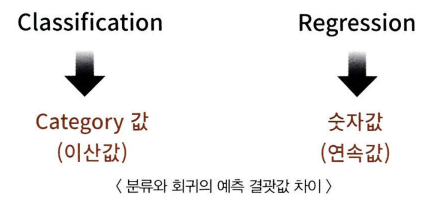

여러 회귀 중에는 선형 회귀가 가장 많이 사용됨.
선형 회귀는 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식

대표적인 선형 회귀 모델

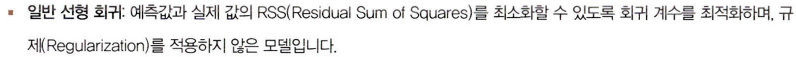
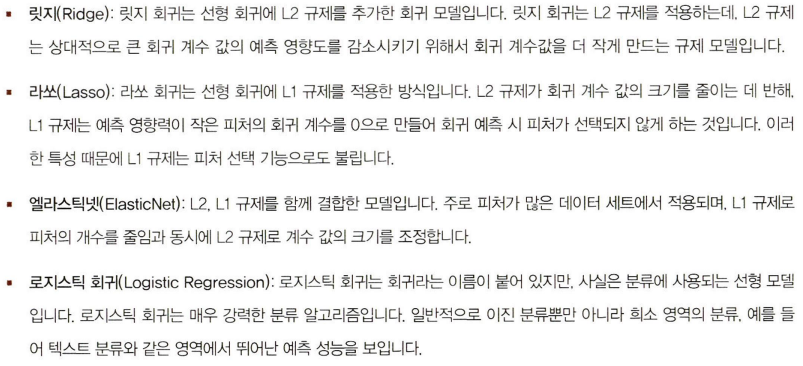

**02 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀.

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 즉 오류 값을 지속해서 감소시키고 최종적으로는 더 이상 감소하는 않는 최소의 오류 값을 구하는 것.

비용 함수를 손실 함수라고도 함

#03 비용 최소화하기 - 경사 하강법 소개

비용 함수가 최소가 되는 W 파라미터

: W 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 W 변숫값을 도출할 수 있겠지만, W 파라미터가 많으면 고차원 방정식을 동원하더라도 어려움.

- 경사 하강법 : 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식.

'데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나.


'점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정.

- 경사 하강법의 일반적인 프로세스
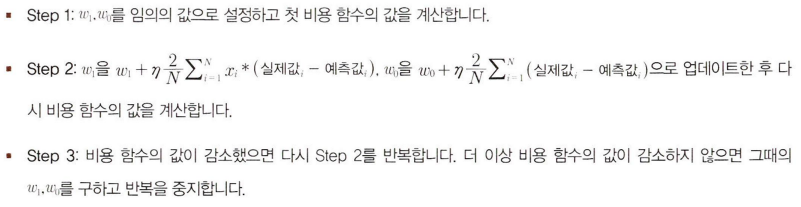

**단순 선형 회귀로 예측할 만한 데이터 세트 만들기**

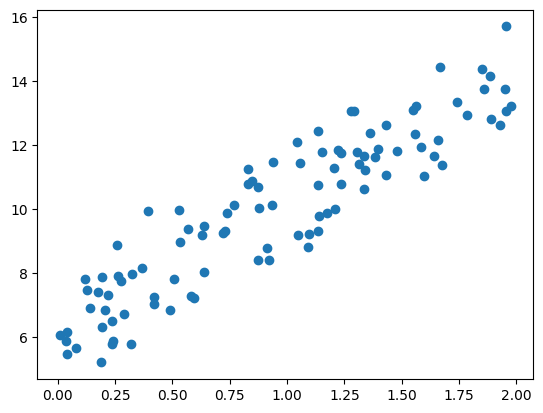

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

데이터는 y=4X+6을 중심으로 무작위로 퍼져 있음.


image.png

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

경사 하강법을 gradient_descent()라는 함수를 생성해 구현.

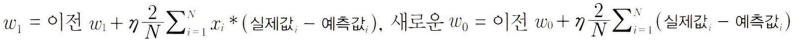

In [3]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측값과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  
  # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

다음은 get_weight_updates()을 경사 하강 방식으로 반복적으로 수행해서 W1과 W0를 업데이트 하는 함수인 gradient_descent_steps() 함수를 생성

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters = 10000):
  # w0과 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()함수를 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

get_cost() : 예측값과 실제값의 RSS 차이 계산.



In [5]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost: 0.9935


w1= 4.022, w2= 6.162, 예측 오류 비용 = 0.9935

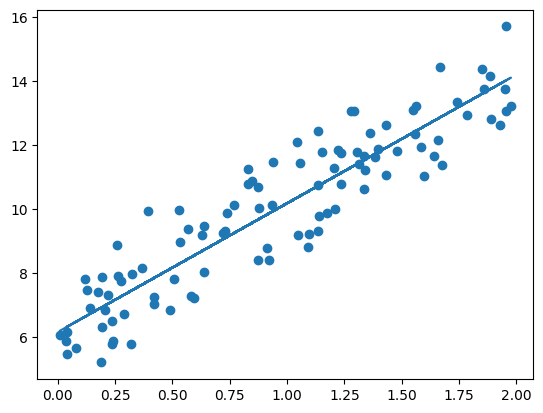

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

회귀선 잘 만들어졌음.

경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수를 최소화 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점.

따라서 실전에서는 대부분 확률적 경사 하강법


- stochastic_gradient_descent_steps()

: 다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update 계산하는 부분만 차이



In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
# 함수 이용해 w1, w0 및 예측 오류 비용을 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1:', round(w1[0, 0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


**05 다항 회귀와 과적합/과소적합 이해**

**다항 회귀 이해**

다항회귀는 선형 회귀임.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 회귀 함수 임의로 설정하고 이의 회귀 계수 예측

In [10]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [12]:
from sklearn.linear_model import LinearRegression


# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**

다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능.

하지만 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐.

즉, 차수가 높아질수록 과적합의 문제가 크게 발생

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과 비교

다항식 차수벼로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능 평가.

그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 그리기




Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


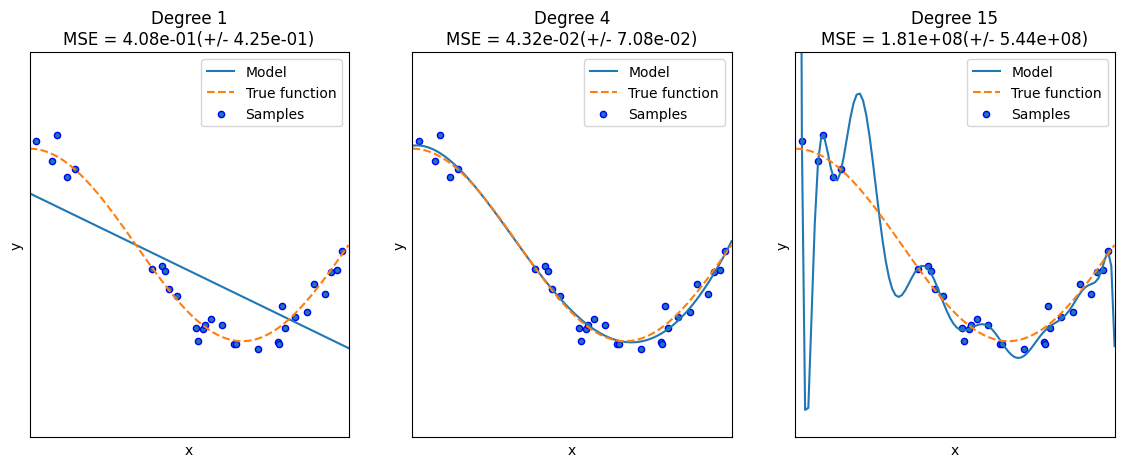

In [16]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks = (), yticks = ())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 예측 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')

  plt.xlabel('x') ; plt.ylabel('y') ; plt.xlim((0,1)) ; plt.ylim((-2, 2)) ; plt.legend(loc = 'best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

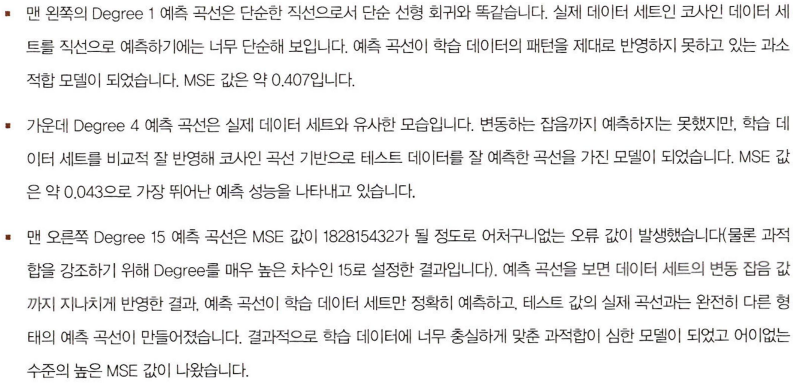

**편향 - 분산 트레이드오프**

머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나